In [1]:
import sys
sys.path.append('../')
import numpy as np
from IPython.display import HTML

from rover_simulator.world import World
from rover_simulator.rover import FollowRover
from rover_simulator.history import SimpleHistory
from rover_simulator.sensor import ImaginalSensor
from rover_simulator.collision_detector import CollisionDetector
from rover_simulator.navigation.localizer import ImaginalLocalizer
from rover_simulator.navigation.controller import ArcPathController
from rover_simulator.navigation.mapper import GridMapper
from rover_simulator.navigation.path_planner.grid_base import Dijkstra, Astar
from rover_simulator.navigation.path_planner.sampling_base import RRT, RRTstar

In [2]:
world = World()
world.read_objects("../rover_simulator/examples/environment_simple.txt")

In [3]:
grid_width = 0.5
rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13, 18])
sensor = ImaginalSensor(obstacles=world.obstacles, fov=np.pi)

path_planner = Astar(map_grid_width=grid_width)
astar_history = SimpleHistory()
astar_rover = FollowRover(
    start_pose, rover_r,
    goal_pos=goal_pos,
    sensor=sensor,
    path_planner = path_planner,
    mapper=GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, known_obstacles=world.obstacles, rover_r=0.5),
    localizer=ImaginalLocalizer(),
    collision_detector=CollisionDetector(world.obstacles),
    controller=ArcPathController(rover_r=0.5),
    history=astar_history,
    color="black", waypoint_color="gray"
)
astar_rover.waypoints = astar_rover.path_planner.calculate_path()

path_planner = RRT(enlarge_range=0.5, explore_region=[[0, 20], [0, 20]], known_obstacles=world.obstacles)
rrt_history = SimpleHistory()
rrt_rover = FollowRover(
    start_pose, rover_r,
    goal_pos=goal_pos,
    sensor=sensor,
    path_planner = path_planner,
    mapper=GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, known_obstacles=world.obstacles, rover_r=0.5),
    localizer=ImaginalLocalizer(),
    collision_detector=CollisionDetector(world.obstacles),
    history=rrt_history,
    color="green", waypoint_color="lawngreen"
)
rrt_rover.waypoints = rrt_rover.path_planner.calculate_path(max_iter=300)

path_planner = RRTstar(enlarge_range=0.7, explore_region=[[0, 20], [0, 20]], known_obstacles=world.obstacles)
rrtstar_history = SimpleHistory()
rrtstar_rover = FollowRover(
    start_pose, rover_r,
    sensor=sensor,
    path_planner = path_planner,
    mapper=GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, known_obstacles=world.obstacles, rover_r=0.5),
    localizer=ImaginalLocalizer(),
    collision_detector=CollisionDetector(world.obstacles),
    history=rrtstar_history,
    color="blue", waypoint_color="aqua",
    goal_pos=goal_pos
)
rrtstar_rover.waypoints = rrtstar_rover.path_planner.calculate_path()

world.append_rover(astar_rover)
world.append_rover(rrt_rover)
world.append_rover(rrtstar_rover)

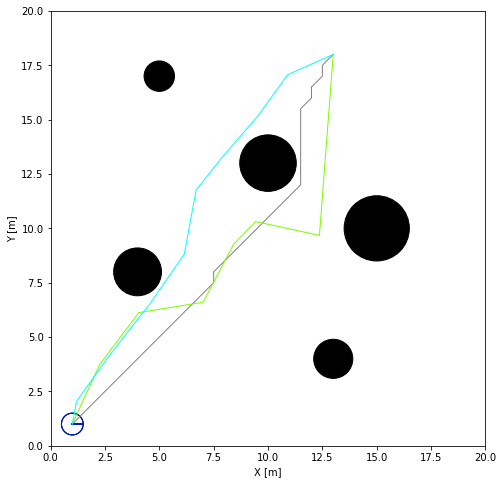

In [4]:
world.draw(xlim=[0, 20], ylim=[0, 20], enlarge_range=0.5, draw_waypoints_flag=True)

In [5]:
world.simulate(200)

  0%|          | 0/200 [00:00<?, ?it/s]

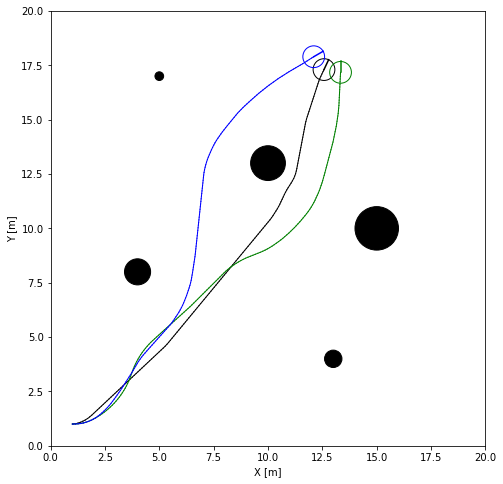

In [6]:
world.draw(xlim=[0, 20], ylim=[0, 20])

In [7]:
world.animate(
    xlim=[0, 20], ylim=[0, 20],
    # enlarge_range=0.5
)
HTML(world.ani.to_jshtml())

  0%|          | 0/200 [00:00<?, ?it/s]

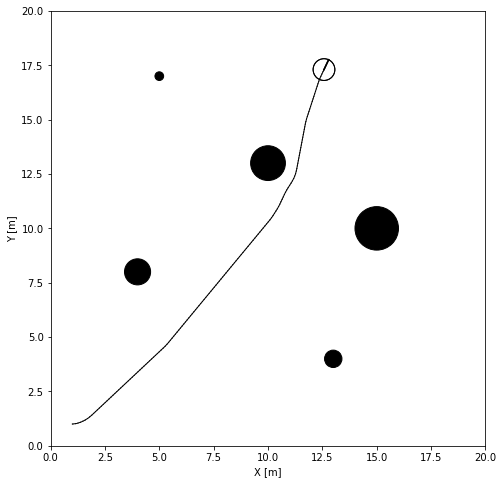

In [8]:
astar_history.draw(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    # enlarge_range=0.5
)

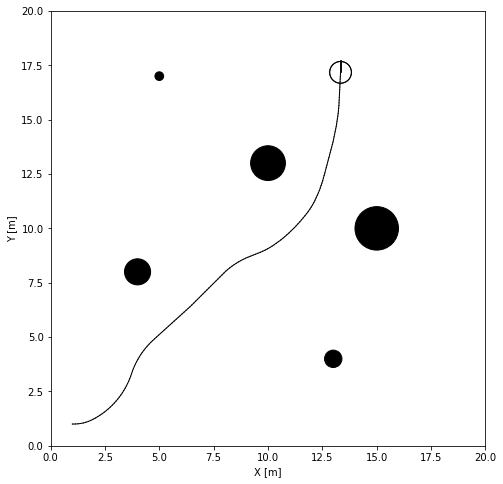

In [9]:
rrt_history.draw(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    # enlarge_range=0.5
)

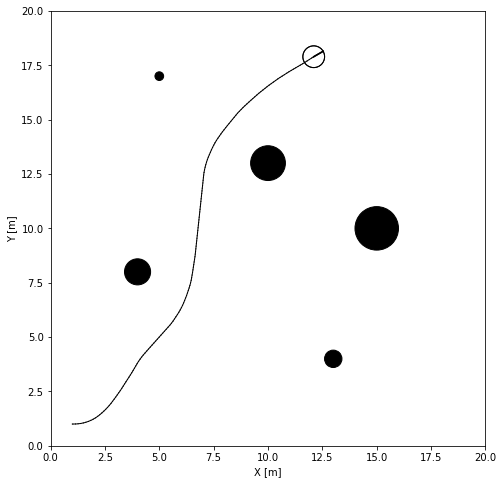

In [10]:
rrtstar_history.draw(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    # enlarge_range=0.5
)